In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'386046ce0d314c9c00db721f126f1708024dccb6453212dd3f49fc89')

In [2]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/386046ce0d314c9c00db721f126f1708024dccb6453212dd3f49fc89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USC00084412,2014-03-22,TMIN,200
1,USC00087760,2010-05-19,TMIN,217
2,USC00087020,2005-12-06,TMAX,272
3,USW00012888,2009-09-07,TMIN,228
4,USR0000FCAC,2010-06-28,TMIN,250


In [3]:
df = df.sort_values(by=['ID','Date', 'Element'])
zip_generator = df['Date'].apply(lambda string: (string[0:4], string[5:]))
df['Year'], df['M-D'] = zip(*zip_generator)

In [4]:
df = df[df['M-D'] != '02-29']
df['Data_Value'] *= 1/10
df.drop(['ID', 'Date'], axis=1, inplace=True)
df2015 = df[df['Year'] == '2015']
df = df[df['Year'] != '2015'] 

In [7]:
import numpy as np
min2015 = df2015[df2015['Element'] == 'TMIN'].groupby('M-D').agg({'Data_Value': np.min})
max2015 = df2015[df2015['Element'] == 'TMAX'].groupby('M-D').agg({'Data_Value': np.max})

In [8]:
min_df = df[df['Element'] == 'TMIN'].groupby('M-D').agg({'Data_Value': np.min})
max_df = df[df['Element'] == 'TMAX'].groupby('M-D').agg({'Data_Value': np.max})

In [9]:
rec_min = np.where(min2015 < min_df)[0]
rec_max = np.where(max2015 > max_df)[0]

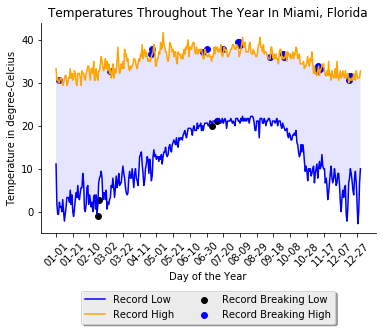

In [32]:
%matplotlib inline
plt.figure()

plt.plot(min_df.values, 'b', label = 'Record Low')
plt.plot(max_df.values, color='orange', label='Record High')

plt.scatter(rec_min, min2015.iloc[rec_min], s=35, marker='o', color='black', label='Record Breaking Low')
plt.scatter(rec_max, max2015.iloc[rec_max], s=35, marker='o', color='blue', label='Record Breaking High')
plt.fill_between(range(len(min_df)), min_df['Data_Value'], max_df['Data_Value'], facecolor='blue', alpha=0.1)
plt.xlabel('Day of the Year')
plt.xticks(range(0, len(min_df), 20), min_df.index[range(0, len(min_df), 20)], rotation='45')
plt.ylabel('Temperature in degree-Celcius')
plt.title('Temperatures Throughout The Year In Miami, Florida')
plt.subplots_adjust(bottom=0.15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=2)

ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

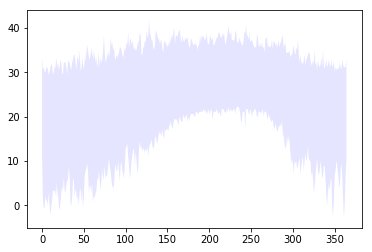

In [15]:
plt.fill_between(range(len(min_df)), min_df['Data_Value'], max_df['Data_Value'], facecolor='blue', alpha=0.1)